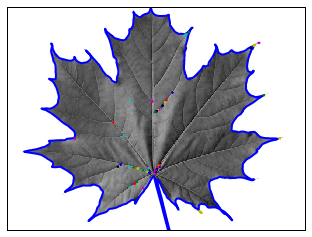

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import measure
from skimage.color import rgb2grey

r = rgb2grey(mpimg.imread('leaf.jpg'))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for contour in (contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

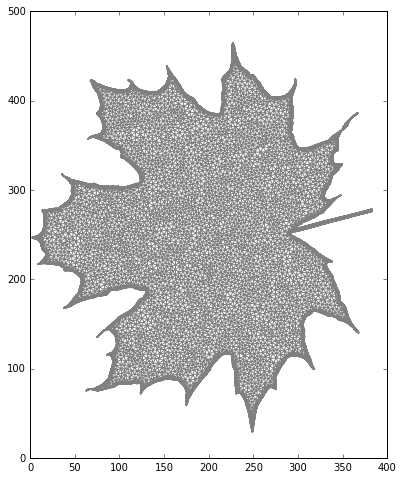

In [31]:
from dolfin import *
from mshr import *

# Select the biggest contour
max_contour = sorted(contours, key=lambda x:len(x), reverse=True)[0]

# Generate the mesh
domain_vertices = [Point(x,y) for x,y in max_contour]

n = 16
geometry = Polygon(domain_vertices)
mesh = generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)

